In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import scipy.stats as stats


# Student Performance Metrics Analysis
https://data.mendeley.com/datasets/5b82ytz489/1

In [55]:
df = pd.read_csv("ResearchInformation3.csv")

### Data Cleaning

In [56]:
# All columns are already in the correct datatypes, with strings being objects,
# and numbers being in float64 (all numbers use decimals so that is appropriate)
# except for the ID, which is an int64
print("\n Datatypes:")
display(df.dtypes)

#Quick check to see if dataset is clean.
print("\n Isnull:")
display(df.isnull().sum())

df['Income'] = df['Income'].str.strip()


 Datatypes:


Department      object
Gender          object
HSC            float64
SSC            float64
Income          object
Hometown        object
Computer         int64
Preparation     object
Gaming          object
Attendance      object
Job             object
English          int64
Extra           object
Semester        object
Last           float64
Overall        float64
dtype: object


 Isnull:


Department     0
Gender         0
HSC            0
SSC            0
Income         0
Hometown       0
Computer       0
Preparation    0
Gaming         0
Attendance     0
Job            0
English        0
Extra          0
Semester       0
Last           0
Overall        0
dtype: int64

## Overall Summary Statistics

### Summary Statistics for Entire Dataset

In [57]:
display(df.describe())

incomes = df.groupby('Income')
home_towns = df.groupby('Hometown')
overall_gpas = df.groupby('Overall')

,HSC,SSC,Computer,English,Last,Overall
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,4.156775,4.767647,3.338742,3.569980,3.163888,3.188383
std,0.546504,0.349538,1.252988,0.870515,0.641475,0.591801
min,2.170000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,3.830000,4.680000,3.000000,3.000000,2.810000,2.880000
50%,4.170000,4.940000,3.000000,4.000000,3.250000,3.270000
75%,4.500000,5.000000,4.000000,4.000000,3.670000,3.680000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000


### Summary Statistics by Income (Low, Lower Middle, Upper Middle, High)

In [58]:
for income,group in incomes:
    sorted = group.sort_values("Income", ascending=True)
    print(f"\nIncome Level: {income}")
    display(sorted.describe())



Income Level: High (Above 50,000)


,HSC,SSC,Computer,English,Last,Overall
count,129.000000,129.00000,129.000000,129.000000,129.000000,129.000000
mean,4.101550,4.79814,3.519380,3.666667,3.153643,3.184729
std,0.516281,0.29805,1.111733,0.793857,0.637653,0.572802
min,2.590000,3.06000,1.000000,2.000000,1.060000,1.060000
25%,3.800000,4.68000,3.000000,3.000000,2.750000,2.890000
50%,4.080000,4.94000,3.000000,4.000000,3.310000,3.270000
75%,4.500000,5.00000,5.000000,4.000000,3.660000,3.670000
max,5.000000,5.00000,5.000000,5.000000,4.000000,4.000000



Income Level: Low (Below 15,000)


,HSC,SSC,Computer,English,Last,Overall
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,4.143649,4.752432,3.310811,3.432432,3.228108,3.232973
std,0.640258,0.426514,1.248842,0.994245,0.615001,0.578789
min,2.250000,3.000000,1.000000,1.000000,1.250000,1.440000
25%,3.670000,4.685000,3.000000,3.000000,3.002500,3.080000
50%,4.170000,4.975000,3.000000,3.000000,3.300000,3.340000
75%,4.522500,5.000000,4.000000,4.000000,3.635000,3.670000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000



Income Level: Lower middle (15,000-30,000)


,HSC,SSC,Computer,English,Last,Overall
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,4.217333,4.764111,3.161111,3.561111,3.134222,3.170644
std,0.525012,0.371706,1.325149,0.891699,0.665754,0.618656
min,2.190000,3.170000,1.000000,1.000000,1.000000,1.000000
25%,3.920000,4.730000,2.000000,3.000000,2.745000,2.844500
50%,4.225000,4.945000,3.000000,4.000000,3.190000,3.250000
75%,4.522500,5.000000,4.000000,4.000000,3.750000,3.700000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000



Income Level: Upper middle (30,000-50,000)


,HSC,SSC,Computer,English,Last,Overall
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.00000
mean,4.131273,4.747909,3.436364,3.563636,3.181245,3.19170
std,0.545408,0.311059,1.267283,0.829803,0.627717,0.58376
min,2.170000,3.960000,1.000000,1.000000,1.000000,1.25000
25%,3.750000,4.567500,3.000000,3.000000,2.912500,2.89250
50%,4.170000,4.880000,3.000000,4.000000,3.250000,3.26500
75%,4.500000,5.000000,5.000000,4.000000,3.645000,3.67000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.00000


### Summary Statistics by Hometown (Village, City)

In [59]:
for home,group in home_towns:
    sorted = group.sort_values("Hometown", ascending=True)
    print(f"\nType:: {home}")
    display(sorted.describe())


Type:: City


,HSC,SSC,Computer,English,Last,Overall
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,4.200939,4.795915,3.732394,3.586854,3.210878,3.223695
std,0.542151,0.329799,1.123813,0.788009,0.595337,0.573349
min,2.250000,3.170000,1.000000,1.000000,1.420000,1.250000
25%,3.830000,4.680000,3.000000,3.000000,2.840000,2.880000
50%,4.190000,5.000000,4.000000,4.000000,3.310000,3.310000
75%,4.580000,5.000000,5.000000,4.000000,3.660000,3.700000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000



Type:: Village


,HSC,SSC,Computer,English,Last,Overall
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,4.123179,4.746143,3.039286,3.557143,3.128143,3.161521
std,0.548376,0.362945,1.265149,0.929573,0.673317,0.605099
min,2.170000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,3.790000,4.690000,2.000000,3.000000,2.750000,2.856500
50%,4.170000,4.855000,3.000000,4.000000,3.250000,3.250000
75%,4.500000,5.000000,4.000000,4.000000,3.680000,3.670000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000


### Summary Statistics by GPA

In [60]:
bins = [0, 1.99, 2.99, 3.99, 4.01]
labels = ["1.00–1.99", "2.00–2.99", "3.00–3.99", "4.00"]

df['GPA_Range'] = pd.cut(df['Overall'], bins=bins, labels=labels, include_lowest=True)

overall_gpas = df.groupby('GPA_Range')

for gpa, group in overall_gpas:
    print(f"\nGPA Range: {gpa}")
    display(group.describe())


GPA Range: 1.00–1.99


/var/folders/rs/fv7q9bln0tx2rdy0fhbblvsm0000gn/T/ipykernel_13619/2178066430.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_gpas = df.groupby('GPA_Range')


,HSC,SSC,Computer,English,Last,Overall
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,4.042917,4.784167,2.875000,3.125000,1.614167,1.652500
std,0.468814,0.272220,1.226962,0.946963,0.404936,0.258663
min,3.000000,4.050000,1.000000,2.000000,1.000000,1.000000
25%,3.730000,4.727500,2.000000,2.000000,1.397500,1.567500
50%,4.125000,4.835000,3.000000,3.500000,1.595000,1.715000
75%,4.500000,5.000000,4.000000,4.000000,1.800000,1.865000
max,4.750000,5.000000,5.000000,4.000000,2.950000,1.970000



GPA Range: 2.00–2.99


,HSC,SSC,Computer,English,Last,Overall
count,135.000000,135.00000,135.000000,135.000000,135.000000,135.000000
mean,3.974519,4.69763,3.140741,3.777778,2.587704,2.637822
std,0.577069,0.35717,1.276440,0.594335,0.336219,0.265667
min,2.170000,3.06000,1.000000,1.000000,1.330000,2.000000
25%,3.580000,4.56000,2.000000,4.000000,2.380000,2.395000
50%,4.000000,4.78000,3.000000,4.000000,2.640000,2.750000
75%,4.500000,5.00000,4.000000,4.000000,2.830000,2.880000
max,5.000000,5.00000,5.000000,5.000000,3.830000,2.980000



GPA Range: 3.00–3.99


,HSC,SSC,Computer,English,Last,Overall
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,4.213375,4.787187,3.440625,3.484375,3.486616,3.500334
std,0.513714,0.353520,1.240477,0.926655,0.344959,0.270945
min,2.190000,3.000000,1.000000,1.000000,1.820000,3.000000
25%,3.867500,4.727500,3.000000,3.000000,3.250000,3.250000
50%,4.250000,5.000000,3.000000,3.000000,3.500000,3.500000
75%,4.500000,5.000000,5.000000,4.000000,3.750000,3.740000
max,5.000000,5.000000,5.000000,5.000000,4.000000,3.980000



GPA Range: 4.00


,HSC,SSC,Computer,English,Last,Overall
count,14.000000,14.000000,14.000000,14.000000,14.0,14.0
mean,4.815714,4.967857,3.714286,4.285714,4.0,4.0
std,0.301476,0.084506,0.994490,0.913874,0.0,0.0
min,4.170000,4.720000,2.000000,3.000000,4.0,4.0
25%,4.665000,5.000000,3.000000,3.250000,4.0,4.0
50%,5.000000,5.000000,3.500000,5.000000,4.0,4.0
75%,5.000000,5.000000,4.750000,5.000000,4.0,4.0
max,5.000000,5.000000,5.000000,5.000000,4.0,4.0


## Hypothesis Testing

### 1. Does time spent on gaming, job, and extracurriculurs affect time spent on preparation?

Chi-square: 149.4092948823017
Degrees of freedom: 22
P-value: 6.1845487021012385e-21


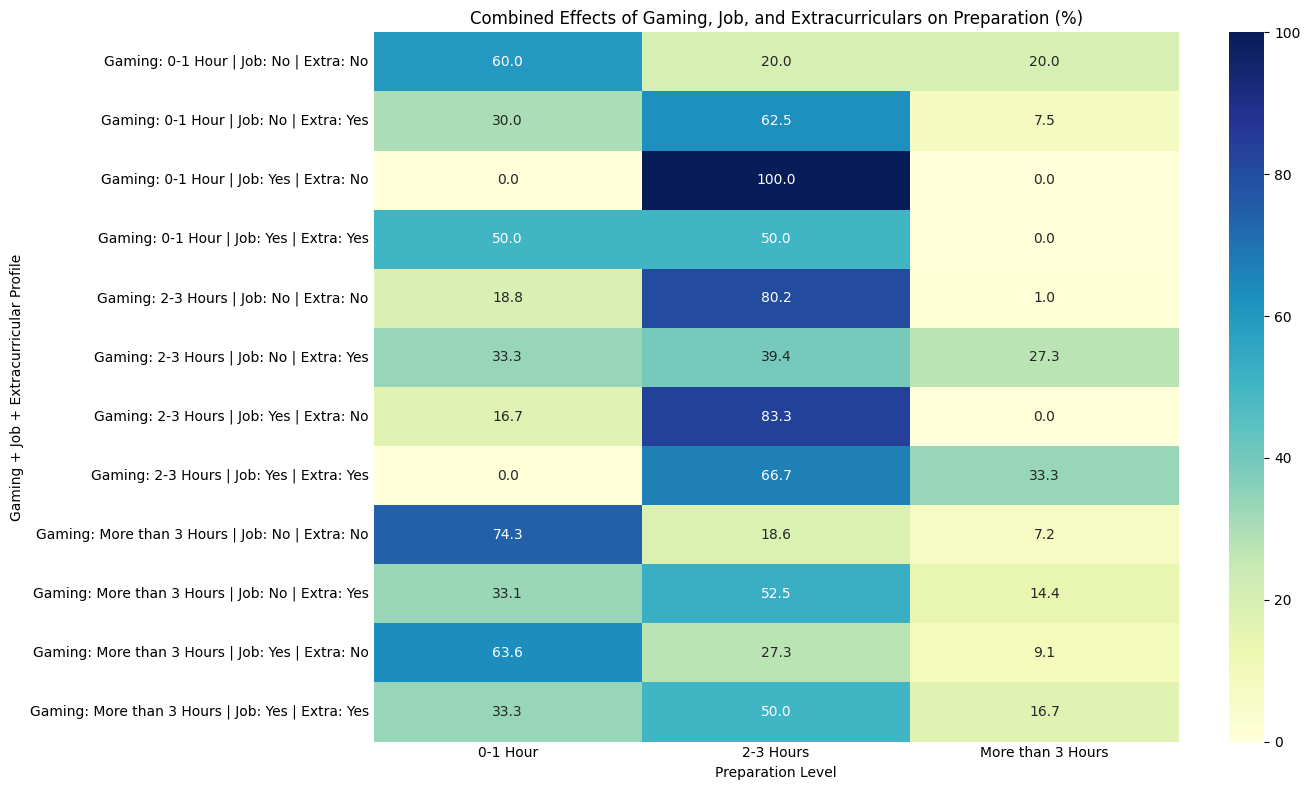

In [61]:
# Creates a Profile column with a combined set of Gaming, Job, and Extracurriculurs
df['Profile'] = ('Gaming: ' +
    df['Gaming'].astype(str) + ' | ' +
    'Job: ' + df['Job'].astype(str) + ' | ' +
    'Extra: ' + df['Extra'].astype(str)
)

prep_dist = df.groupby('Profile')['Preparation'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

contingency = pd.crosstab(df['Profile'], df['Preparation'])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print(f"Chi-square: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p}")

# Heatmap
heatmap_data = prep_dist.pivot(index='Profile', columns='Preparation', values='Percentage')
heatmap_data = heatmap_data.fillna(0)  # Replace NaN with 0

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Combined Effects of Gaming, Job, and Extracurriculars on Preparation (%)")
plt.xlabel("Preparation Level")
plt.ylabel("Gaming + Job + Extracurricular Profile")
plt.xticks(rotation=0)
plt.tick_params(axis='x', length=0)
plt.yticks(rotation=0)
plt.tick_params(axis='y', length=0)
plt.tight_layout()
plt.show()

### 2. Does the level of income have an impact on the computer proficiency level of a student? (α = 0.10)
H0: There is no difference between the computer proficiencies of any of the students based on their levels of income.

HA: There is a difference between at least one of the level of incomes due to computer proficiency.

Income
High (Above 50,000)             3.519380
Low (Below 15,000)              3.310811
Lower middle (15,000-30,000)    3.161111
Upper middle (30,000-50,000)    3.436364
Name: Computer, dtype: float64


/var/folders/rs/fv7q9bln0tx2rdy0fhbblvsm0000gn/T/ipykernel_13619/743465771.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=groups, y=value, data=df, palette='deep')


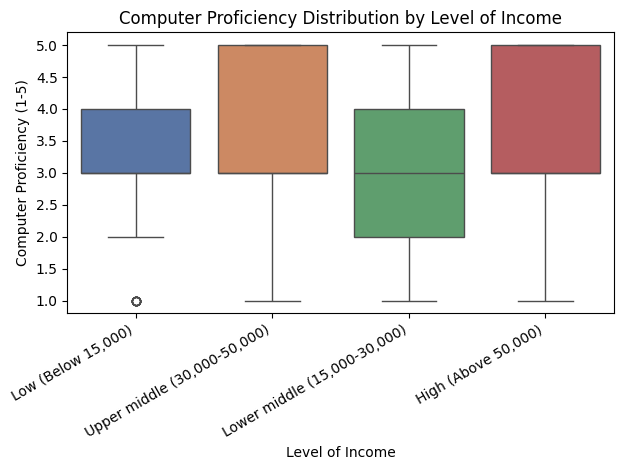

P-value for one-way ANOVA test: 0.0713386281485567
Post-Hoc (Tukey's HSD): Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.150     0.821    -0.295     0.594
 (0 - 2)     -0.126     0.909    -0.609     0.358
 (0 - 3)     -0.209     0.661    -0.678     0.261
 (1 - 0)     -0.150     0.821    -0.594     0.295
 (1 - 2)     -0.275     0.264    -0.665     0.114
 (1 - 3)     -0.358     0.063    -0.729     0.013
 (2 - 0)      0.126     0.909    -0.358     0.609
 (2 - 1)      0.275     0.264    -0.114     0.665
 (2 - 3)     -0.083     0.956    -0.500     0.334
 (3 - 0)      0.209     0.661    -0.261     0.678
 (3 - 1)      0.358     0.063    -0.013     0.729
 (3 - 2)      0.083     0.956    -0.334     0.500



In [62]:
groups = 'Income'
value = 'Computer'

summary = df.groupby(groups)[value].mean()
print(summary)


low = df[df[groups] == 'Low (Below 15,000)'][value]
low_mid  = df[df[groups] == 'Lower middle (15,000-30,000)'][value]
upper_mid = df[df[groups] == 'Upper middle (30,000-50,000)'][value]
high= df[df[groups] == 'High (Above 50,000)'][value]

# Box Plot & ANOVA Test - Post Hoc (Tukey's HSD)

# Boxpolot
sns.boxplot(x=groups, y=value, data=df, palette='deep')
plt.title("Computer Proficiency Distribution by Level of Income")
plt.xlabel("Level of Income")
plt.ylabel("Computer Proficiency (1-5)")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# ANOVA
p_value = stats.f_oneway(low, low_mid, upper_mid, high).pvalue
print(f"P-value for one-way ANOVA test: {p_value}")

# Post Hoc (Tukey's HSD)
tukey = stats.tukey_hsd(low, low_mid, upper_mid, high)
print(f"Post-Hoc (Tukey's HSD): {tukey}")


### 3. Does the Highschool GPA correlate to College Overall GPA? (α = 0.05)
H0: There is no a significant relationship between High School GPA and College GPA

HA: There is a significant relationship between High School GPA and College GPA

Spearman's Rank Coefficient (rho) =  0.28651230272124145
p-value 9.061356278570244e-11


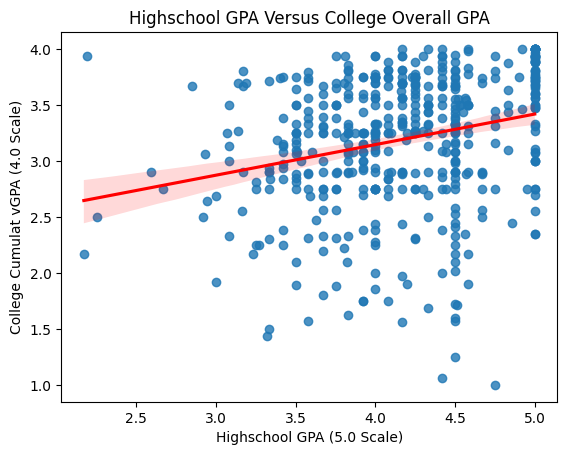

In [63]:
x_val = 'HSC'
y_val = 'Overall'
df_hyp3 = df[[x_val, y_val]]

rho, p = stats.spearmanr(df_hyp3[x_val], df_hyp3[y_val])
print("Spearman's Rank Coefficient (rho) = ", rho)
print("p-value", p)

#Scatter Plot & Regression Analysis & Spearman's Rank Correlation
sns.regplot(x=x_val, y=y_val, data=df_hyp3, line_kws={'color':'red'})
plt.title('Highschool GPA Versus College Overall GPA')
plt.xlabel('Highschool GPA (5.0 Scale)')
plt.ylabel('College Cumulat vGPA (4.0 Scale)')
plt.show()

## Conclusions

### 1. Does time spent on gaming, job, and extracurriculars affect time spent on preparation?

The p-value of the Chi-squared test is less than .01, the value of α. 
Based off the heatmap, those who have an extracurricular tend to prepare for 2-3 hours most of the time. However, those who game for over 3 hours tend to prepare the least at around 0-1 hours, even if they have an extracurricular.

Otherwise, there does not appear to be a significant relation between time spent on preparation and time spent on gaming or having a job, as across all groups who devote time to gaming, a job, or an extracurricular, but game less than 2-3 hours, the time spent on preparation tends to be 2-3 hours.

### 2. Does the level of income have an impact on the computer proficiency level of a student?

The p-value of our ANOVA test is greater than 0.01, the value of α. Since the p-value ≤α, it is unlikely that we would observe the results of this test if there was no difference between the computer proficiencies of students from different income level. Thus, we reject the null hypothesis.

In regards to Tukey's Post-Hoc test, the p-values of all pairings are ≤α, so we can conclude that there are differences between each income level in regards to computer proficiency.

### 3. Does the High School GPA correlate to College Overall GPA?
The p-value of our Spearman's Rank Correlation test is less than 0.05, the value of α. Since the p-value ≤α, the correlation coefficient is statistically significant, and we reject the null hypothesis.

Thus, there is a significant relationship between High School GPA and College Overall GPA. Additionally, because the the Spearman's Rank Coefficient was positive, we know that this relationship is a positive one.